### Cross-Entropy

In [42]:
import numpy as np

# Define the cross entropy function
def cross_entropy(y_pred, y_true):
    n = y_pred.shape[0]
    log_likelihood = -np.log(y_pred[range(n), y_true])
    loss = np.sum(log_likelihood) / n
    return loss

# Predicted probabilities (for example purposes only)
y_pred = np.array([[0.1, 0.2, 0.7], [0.3, 0.4, 0.3]])

# True labels
y_true = np.array([2, 1])

# Calculate cross entropy loss
loss = cross_entropy(y_pred, y_true)

print(f'Cross entropy loss: {loss}')


Cross entropy loss: 0.6364828379064438


In [45]:
import numpy as np

# Define the cross entropy function
def cross_entropy(y_pred, y_true):
    n = y_pred.shape[0]
    log_likelihood =  - np.multiply(y_true, np.log(y_pred))
    loss = np.sum(log_likelihood) / n
    return loss

# Predicted probabilities (for example purposes only)
y_pred = np.array([[0.1, 0.2, 0.7], [0.3, 0.4, 0.3]])

# True labels with one-hot encoding
y_true = np.array([[0, 0, 1], [0, 1, 0]])

# Calculate cross entropy loss
loss = cross_entropy(y_pred, y_true)

print(f'Cross entropy loss: {loss}')

Cross entropy loss: 0.6364828379064438


### Softmax, Sigmoid

In [29]:
import numpy as np

def softmax(x):
    exp = np.exp(x - np.max(x))
    return exp / exp.sum(axis=0)

x = np.array([1.0, 2.0, 3.0, 4.0])
print(softmax(x))

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

x = np.array([1.0, 2.0, 3.0, 4.0])
print(sigmoid(x))

[0.0320586  0.08714432 0.23688282 0.64391426]
[0.73105858 0.88079708 0.95257413 0.98201379]


### K-Means

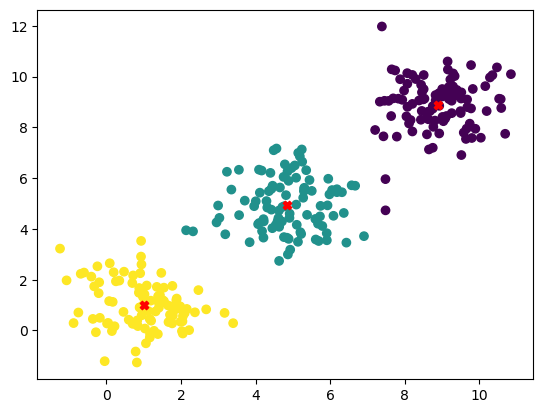

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, k, iterations=500):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(iterations):
        dist = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        idx = np.argmin(dist, axis=1)
        centriods = np.array([X[idx == i].mean(axis=0) for i in range(k)])
    
    return centriods, idx

X = np.concatenate([np.random.normal(1, scale=1, size=(100, 2)),
                    np.random.normal(5, scale=1, size=(100, 2)),
                    np.random.normal(9, scale=1, size=(100, 2))], axis=0)

centroids, idx = k_means(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=idx)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.show()

In [62]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F

class Attention(nn.Module):
    def __init__(self, heads, dim) -> None:
        super().__init__()
        self.heads = heads
        self.head_dim = dim // heads
        self.wq = nn.Linear(dim, self.head_dim * heads, bias=False)
        self.wk = nn.Linear(dim, self.head_dim * heads, bias=False)
        self.wv = nn.Linear(dim, self.head_dim * heads, bias=False)
        self.wo = nn.Linear(self.head_dim * heads, dim, bias=False)
    
    def forward(self, xq, xk, xv, masks, start_pos):
        b, seq_len, dim = xq.shape
        
        xq = self.wq(xq)
        xk = self.wk(xk)
        xv = self.wv(xv)
        
        xq = xq.view(b, seq_len, self.heads, -1).transpose(1, 2)
        xk = xk.view(b, seq_len, self.heads, -1).transpose(1, 2)
        xv = xv.view(b, seq_len, self.heads, -1).transpose(1, 2)
        
        scores = torch.matmul(xq, xk.transpose(2, 3)) / math.sqrt(self.head_dim)
        
        if masks:
            masks = torch.full((1, 1, seq_len, seq_len), float('-inf'), device=scores.device)
            masks = torch.triu(masks, diagonal=start_pos + 1).type_as(scores)
            scores += masks
        
        scores = F.softmax(scores, dim=-1).type_as(scores)
        output = torch.matmul(scores, xv).transpose(1, 2)
        output = output.contiguous().view(b, seq_len, -1)
        output = self.wo(output)
        
        return output

x = torch.rand((10, 10, 16))
attention = Attention(heads=4, dim=16)
with torch.no_grad():
    print(attention.forward(x, x, x, True, 2))

tensor([[[-0.0233,  0.0166, -0.2709,  ...,  0.0599, -0.0189, -0.0177],
         [-0.0194,  0.0306, -0.2439,  ...,  0.0723, -0.0106, -0.0106],
         [-0.0447,  0.0187, -0.1920,  ...,  0.1409, -0.0061, -0.0252],
         ...,
         [-0.0628,  0.0250, -0.1826,  ...,  0.1854, -0.0100, -0.0280],
         [-0.0631,  0.0251, -0.1824,  ...,  0.1861, -0.0089, -0.0279],
         [-0.0643,  0.0260, -0.1822,  ...,  0.1849, -0.0100, -0.0287]],

        [[-0.0463,  0.0766, -0.2101,  ...,  0.2378, -0.0426, -0.1166],
         [-0.0443,  0.0983, -0.2006,  ...,  0.2094, -0.0393, -0.1354],
         [-0.0566,  0.1178, -0.2069,  ...,  0.1983, -0.0417, -0.1463],
         ...,
         [-0.0832,  0.0521, -0.1622,  ...,  0.2030, -0.0219, -0.1121],
         [-0.0849,  0.0531, -0.1606,  ...,  0.2061, -0.0226, -0.1119],
         [-0.0833,  0.0519, -0.1621,  ...,  0.2040, -0.0219, -0.1120]],

        [[-0.0690,  0.1026, -0.2888,  ...,  0.2210, -0.0160, -0.1947],
         [-0.0589,  0.1280, -0.2730,  ...,  0

### Pytorch Workflow

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class Data(Dataset):
    def __init__(self, x, y) -> None:
        super().__init__()
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        return self.x[index].to_numpy(), self.y[index].to_numpy()
    
    def __len__(self):
        return len(self.x)


def train(train_dataloader, test_dataloader, model, loss_fn, optimizer, epoch):
    model.train()
    
    for e in range(1, epoch + 1):
        for iter, (x, y) in tqdm(enumerate(train_dataloader)):
            pred = model(x)
            loss = loss_fn(pred, y)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            if iter % 100 == 0:
                print(f'Epoch: {e}, step: {iter}, loss: {loss.item()}')
                test_loss = test(test_dataloader, model, loss_fn)
                print(f'Test loss: {test_loss}')
                model.train()
        
    return model
            
def test(dataloader, model, loss_fn):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x, y in dataloader:
            pred = model(x)  
            loss = loss_fn(pred, y)
            total_loss += loss.item()
            
    return total_loss / len(dataloader)

df = pd.read_csv('....csv')
data, label = df.drop(columns=['label']), df['label'] 
x_train, y_train, x_test, y_test = train_test_split(data, label, test_size=0.2, shuffle=True)

batch_size = 32
epoch = 10
lr = 1e-3

train_data = Data(x_train, y_train)
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_data = Data(x_test, y_test)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

model = Attention(4, 16)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters, lr=lr)

model = train(train_dataloader, test_dataloader, model, loss_fn, optimizer, epoch)

torch.save(model.state_dict(), 'model.pth')

model = Attention(heads=4, dim=16)
model.load_state_dict(torch.load('model.pth'))